<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 1: Visualisation for Network Traffic Analysis (2022)
---

The completion of this worksheet is worth a **maximum of 20 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

You have been asked to examine a sample of network traffic to investigate suspicious activity on some of the company workstations. The company directors need to be able to understand this data. Your task is to **produce a series of different visual representations to describe and understand the characteristics of the data, based on the task questions below**. You should use the [Matplotlib documentation](https://matplotlib.org/stable/api/index.html) and the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) to learn about the library functionality, as well as other online resources. 

### Assessment and Marking
---

For each question you will see the maximum number of marks you may be awarded for a complete answer in brackets.

* **Task 1:** Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)
* **Task 2:** Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)
* **Task 3:** Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)
* **Task 4:** Display a Scatter Chart that shows the association between Source and Destination data. (2)
* **Task 5:** Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)
* **(Advanced) Task 6:** Display a Node Link Diagram for this new DataFrame. (3)
* **(Advanced) Task 7:** For each Protocol type contained in this Dataframe, create a new Column and assign whether the Protocol usage is True or False. (3)
* **(Advanced) Task 8:** Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

This assignment should be submitted as as PDF to your Blackboard portfolio submission as per the instructions in the assignment specification available on Blackboard. A copy of your work should also be provided via a UWE Gitlab repository, with an accessible link provided with your portfolio.
 
### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [46]:
### Load in the libraries and the data
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

data = pd.read_csv('./2022-task1_data.csv')
data

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
1,2,0.000050,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0
2,3,0.000240,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5..."
3,4,0.186710,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...
4,5,1.119689,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
...,...,...,...,...,...,...,...
34465,34466,819.314740,PcsCompu_03:cb:a5,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.12
34466,34467,820.066244,PcsCompu_60:73:28,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.11
34467,34468,820.146617,PcsCompu_90:18:5a,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.14
34468,34469,820.224071,PcsCompu_c8:46:cd,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.13


### Task 1: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)

*Hint: The Time column could be grouped by minute by changing the precision of how time is measured.*

In [2]:
print(data.columns) # Shows the name of columns in the csv file "2022-task1_data.csv"

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')


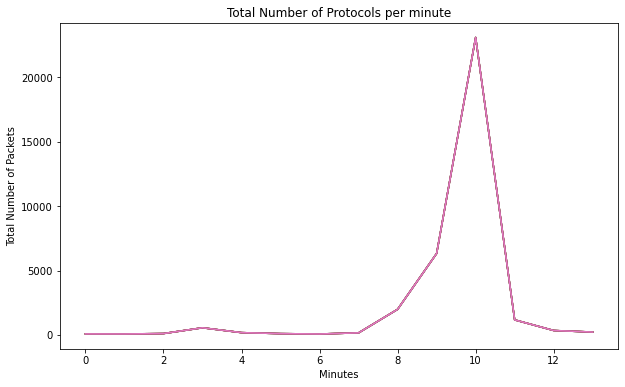

In [17]:
# ANSWER

data['Minutes'] = data['Time']//60 # Creates a new column in the table with a Converted version of "Time" (Seconds) into Minutes

new_names = {'No.':'Number' } # Renames the column of "No." to "Number" for ease of calling the column name
data.rename(columns=new_names, inplace=True) # Ensures the column is replaced in the table with no error

data.groupby('Minutes').count().plot(kind='line', legend = None) 
# Plots a graph displaying how many Minutes it takes to accomplish a certain amount packets

plt.xlabel('Minutes') # Labels the x and Y axis
plt.ylabel('Total Number of Packets')
plt.title('Total Number of Protocols per minute') # Titles the graph
plt.gcf().set_size_inches(10, 6) # Sets Graph size (easier to read)

# The Graph displays the Total Number of Packets per Minute

As shown on the graph there is a large spike between 9 and 10 minutes.  

The reason for the spike in packet number would be most likely the fact that the files between 9-10 minutes were broadcasted. As the only difference between the prior minutes, is that the Total number of packets used spiked when the Destination had the value of "Broadcast".

Normally when files or data is broadcated/streamed, many packets of data will be passed back and forth between a client and service. To further that suspicion, the two protocols that caused this spike is "TCP" and "SMB" which are file transfer and security on a network protocols. Explaining the anomalie of the spike in packet numbers

Another thing when streaming data is that its very easily hackable when streamlining data. As TCP and SMB protocols are used for security and transfer of data, many more protocols are used to help protect the data being broadcasted.

.

### Task 2: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)

*Hint: Group you data by "Time" and then you can take the sum of the Length column.*

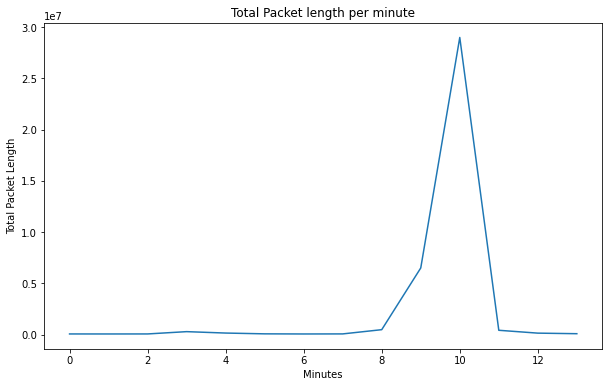

In [24]:
# ANSWER

# All of the Protocol lengths that happened on a certain minute is summed up then displayed on a graph
(data.groupby('Minutes').sum())['Length'].plot(kind='line') 
plt.xlabel('Minutes') # Labels the x and Y axis
plt.ylabel('Total Packet Length')
plt.title('Total Packet length per minute') # Titles the graph
plt.gcf().set_size_inches(10, 6) # Sets Graph size (easier to read)

# The graph displays the total packet length per minute.

Just like the previous graph, there is a large spike between 9 and 10 minutes.  

However, this graph is displaying the total packet length per minute. 
The reason for the spike in packet lengths is once again the fact that the files between 9-10 minutes were broadcasted. As the only difference between the prior minutes, is that the Total packet length spiked when the Destination had the value of "Broadcast".

When data is broadcasted/streamed, the length of packets is known to be longer. The reason for this anomalie is that when streaming data, a large amount of data is sent back and forth between a client and a service so there are no buffers in the stream. Which is unlike the rest of the packet lengths as they are not broadcasted. Explaing the spike in the packet lengths.


.

### Task 3: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

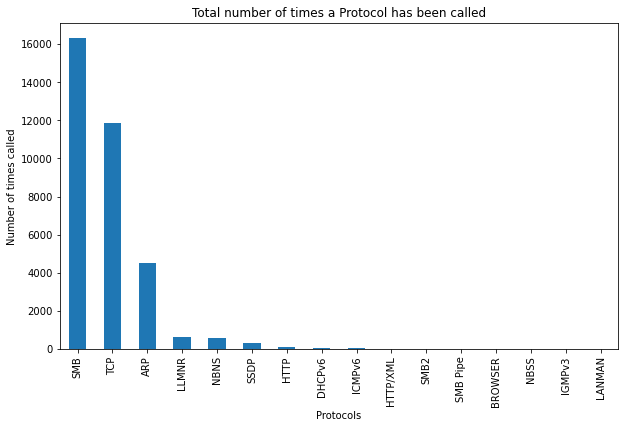

In [30]:
# ANSWER

# A barchart is made and will display how many times a Protocol is called
data['Protocol'].value_counts().plot(kind='bar')
plt.xlabel('Protocols') # Labels the x and Y axis
plt.ylabel('Number of times called')
plt.title('Total number of times a Protocol has been called') # Titles the graph
plt.gcf().set_size_inches(10, 6) # Sets Graph size (easier to read)

# The barchart below displays how many times a certain Protocol has been called

The Graph above displays the number of Protocols called throughtout the whole dataframe. 

The bar-chart depicts that the Protocols "SMB", "TCP" and "ARP" are called alot more than the others, this corrolates with the line graphs displayed in Task 1 and Task 2. These protocols appear more as they are the primary protocols used for the transference of data files and security of those files. So the spike makes sense as these protocols are called more times than any other protocols as the dataframe is all about passing data between a source and a destination device.

### Task 4: Display a Scatter Chart that shows the association between Source and Destination data. (2)

*Hint: Matplotlib has a scatterplot function that takes ***x*** and ***y*** as inputs*

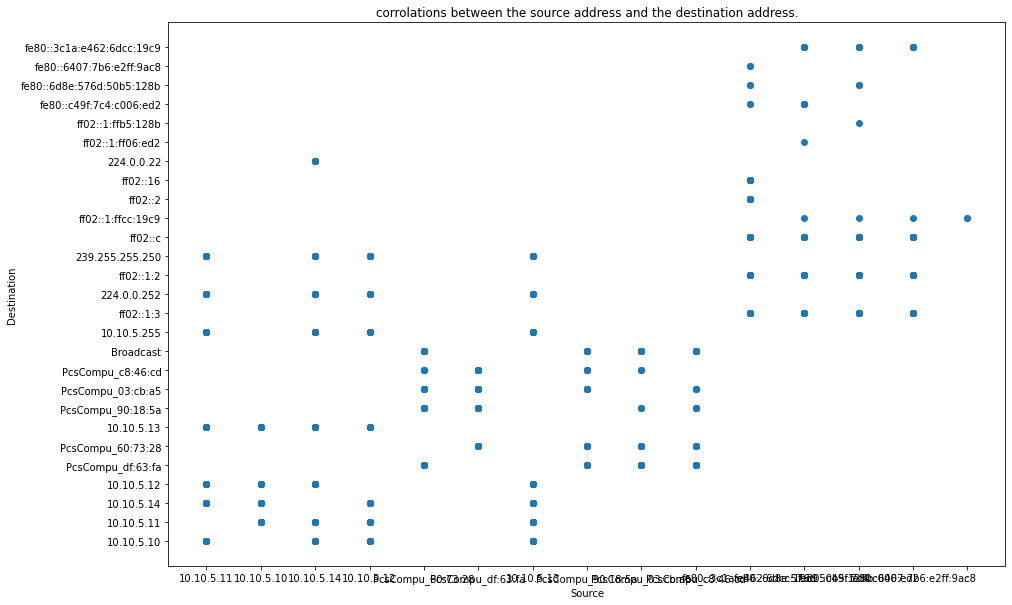

In [41]:
### ANSWER

# Plots a scatter plot displaying the corrolations between Source and Destination data
plt.scatter('Source', 'Destination', data=data)
plt.xlabel('Source') # Labels the x and Y axis
plt.ylabel('Destination')
plt.title('corrolations between the source address and the destination address.') # Titles the graph
plt.gcf().set_size_inches(15, 10) # Sets Graph size (easier to read)

plt.show()

# The Graph displays the connection between the Source and Destination addresses.

The Scatter plot above displays the connections between Source and Destination addresses. Each time files were transfered from a source address to a destination address, a plot is displayed on the graph to mark that connection. 

The information that can be extracted from this graph is that the source addresses that begin with 'fe80' will primarily send files to a destination address that begin with 'fe80' and 'ff02'.
As well as the source addresses that begin with '10.' primarily interacts with destination addresses that also begin with '10.' or '239.'.

From the graph it is quiet clear that devices with similar source and destination address's will interact with eachother. Most likely due to the devices being of the same type.

### Task 5: Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)

*Hint: Retrieve all rows where the Source string starts with 10.*

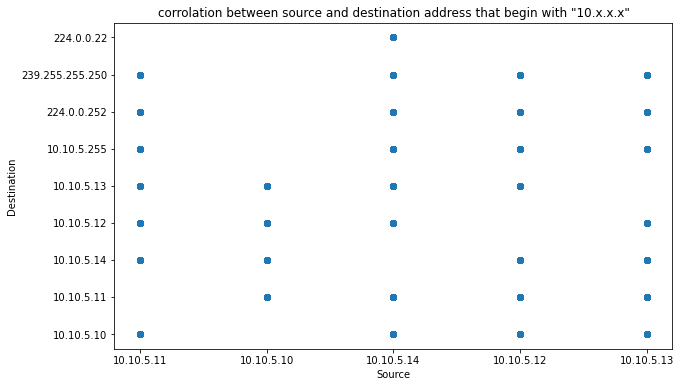

In [43]:
# ANSWER

# Creates a new dataframe that only contains the source column where the source begins with "10.x.x.x"
filtered = data['Source'].str.startswith("10.")

# Makes a new dataframe, based on filtered dataframe, that pulls the rest of the row data from "data" associated on the same rows.
fildata = data[filtered].copy()

# Plots the corrolations between the source address's that begin with "10.x.x.x" with their destinations.
plt.scatter('Source', 'Destination', data=fildata)
plt.xlabel('Source') # Labels the x and Y axis
plt.ylabel('Destination')
plt.title('corrolation between source and destination address that begin with "10.x.x.x"') # Titles the graph
plt.gcf().set_size_inches(10, 6) # Sets Graph size (easier to read)

plt.show()
# The Graph displays the connection between the Source and Destination addresses.
# That begin with only '10.x.x.x'

Displayed on the scatter plot above, the graph more clearly points out the connections between source and destination addresses that begin with '10.x.x.x'  will contact each other.

with the exception of the destination addresses '224.', '239.' and '224.'. Shown in the graph above there is an weird anomalie as only one of the source addresses have contact that no others do. '10.10.5.14' is in contact with the destination address of '224.0.0.22'.


.

### (Advanced) Task 6: Display a Node Link Diagram for this new DataFrame. (3)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

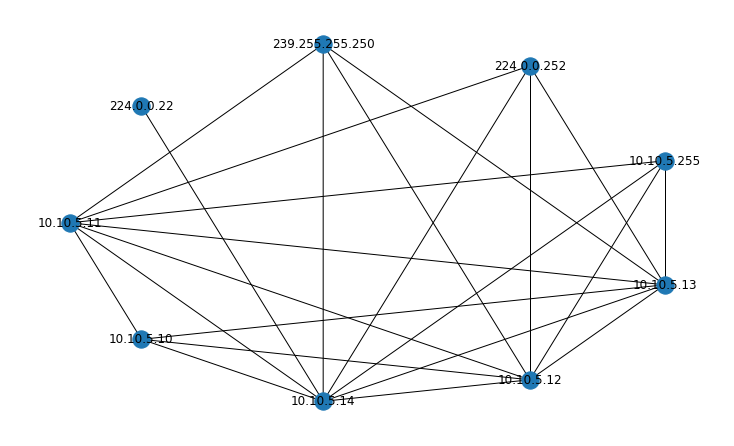

In [8]:
# ANSWER

# Makes a node link diagram that displays how source and destination address's connect with eachother
G = nx.from_pandas_edgelist(fildata, "Source", "Destination")
nx.draw_shell(G, with_labels = True)
plt.gcf().set_size_inches(10, 6) # Sets Graph size (easier to read)

The Node link diagram shown above enhances the connections between source and destination addresses.

Once again more clearly the destination address '224.0.0.22' has only been in contact with the source address of '10.10.5.14'.  The protocol that was made when the addresses' contacted each other was the protocol 'IGMPv3'.

The protocol 'IGMPv3' is regularly used when streaming or gaming. As the Address '224.0.0.22' is only used by a single source address, it must be a streaming service as the address only recieves the data.


.

### (Advanced) Task 7: For each Protocol type contained in this Dataframe, create a new Column and assign whether the Protocol usage is True or False (3)

*Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.*



In [9]:
# ANSWER
Task7 = fildata.copy() # Creates a new dataframe called "Task7"

# Hot encodes the data. It will create a 'true' or 'false' system based on each protocol
# (if its the protocol there is a 1, if its not then theres a 0.)
Hotcoded_data = pd.concat([Task7,pd.get_dummies(Task7['Protocol'], prefix='Protocol')],axis=1)

Hotcoded_data.drop(['Protocol'],axis=1, inplace=True) # drops the column "Protocol"
Hotcoded_data

# A new dataframe is created, where the protocols are seperated and given 'true' or 'false' values.

,Number,Time,Source,Destination,Length,Info,Minutes,Protocol_BROWSER,Protocol_HTTP,Protocol_HTTP/XML,Protocol_IGMPv3,Protocol_LANMAN,Protocol_LLMNR,Protocol_NBNS,Protocol_NBSS,Protocol_SMB,Protocol_SMB Pipe,Protocol_SMB2,Protocol_SSDP,Protocol_TCP
0,1,0.000000,10.10.5.11,10.10.5.10,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0.000050,10.10.5.10,10.10.5.11,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,0.000240,10.10.5.10,10.10.5.11,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5...",0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,0.186710,10.10.5.11,10.10.5.10,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,1.119689,10.10.5.14,10.10.5.10,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34455,34456,818.104499,10.10.5.13,10.10.5.10,8214,"49196 > 1293 [PSH, ACK] Seq=298831 Ack=811 W...",13.0,0,0,0,0,0,0,0,0,0,0,0,0,1
34456,34457,818.104531,10.10.5.10,10.10.5.13,54,1293 > 49196 [ACK] Seq=811 Ack=306991 Win=43...,13.0,0,0,0,0,0,0,0,0,0,0,0,0,1
34457,34458,818.104875,10.10.5.10,10.10.5.13,69,"1293 > 49196 [PSH, ACK] Seq=811 Ack=306991 W...",13.0,0,0,0,0,0,0,0,0,0,0,0,0,1
34460,34461,818.294131,10.10.5.13,10.10.5.10,60,49196 > 1293 [ACK] Seq=306991 Ack=826 Win=25...,13.0,0,0,0,0,0,0,0,0,0,0,0,0,1


Each protocol has been seperated into its own column with values of 'true' and 'false', also known as hot-encoding the data.

One-hot encoding is normally used in machine learning as its easier to feed data with '1's and '0's to train models. However, it is also very helpful when  distinguishing between different protocols that are being assessed and ploted into graphs.

Such as searching through the data for a certain protocol is alot easier and faster as its a binary value. As well as giving a unique value making it an individual so it is easier to search for data related to that protocol.


.

### (Advanced) Task 8: Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

*Hint: Think about how you did this in Task 1 and Task 2, and recall that plt.plot can be used to append to a plot.*

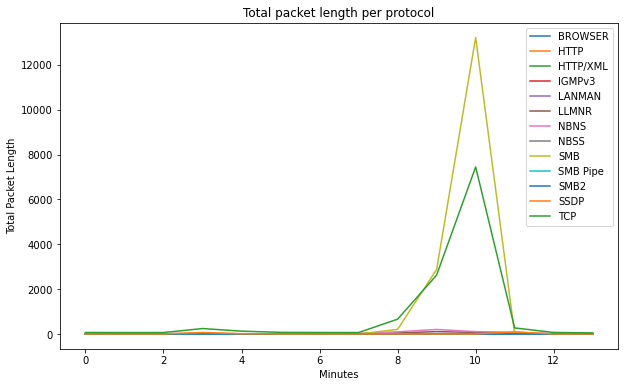

In [11]:
# Using the Hot_encoded data frame, much like task 2. 
# Creates a graph displaying the sum total length of every individual protocol during a certain minute.

x = Hotcoded_data[['Length','Minutes','Protocol_BROWSER']].groupby('Minutes').sum() # Sum of length for Protocol_Browser
x['Protocol_BROWSER'].plot(kind='line', label = 'BROWSER')
y = Hotcoded_data[['Length','Minutes','Protocol_HTTP']].groupby('Minutes').sum() # Sum of length for Protocol_HTTP
y['Protocol_HTTP'].plot(kind='line', label = 'HTTP')
z = Hotcoded_data[['Length','Minutes','Protocol_HTTP/XML']].groupby('Minutes').sum()  # Sum of length for Protocol_HTTP/XML
z['Protocol_HTTP/XML'].plot(kind='line', label = 'HTTP/XML')
a = Hotcoded_data[['Length','Minutes','Protocol_IGMPv3']].groupby('Minutes').sum()  # Sum of length for Protocol_IGMPv3
a['Protocol_IGMPv3'].plot(kind='line', label = 'IGMPv3')
b = Hotcoded_data[['Length','Minutes','Protocol_LANMAN']].groupby('Minutes').sum()  # Sum of length for Protocol_LANMAN
b['Protocol_LANMAN'].plot(kind='line', label = 'LANMAN')
c = Hotcoded_data[['Length','Minutes','Protocol_LLMNR']].groupby('Minutes').sum()  # Sum of length for Protocol_LLMNR
c['Protocol_LLMNR'].plot(kind='line', label = 'LLMNR')
d = Hotcoded_data[['Length','Minutes','Protocol_NBNS']].groupby('Minutes').sum()  # Sum of length for Protocol_NBNS
d['Protocol_NBNS'].plot(kind='line', label = 'NBNS')
e = Hotcoded_data[['Length','Minutes','Protocol_NBSS']].groupby('Minutes').sum()   # Sum of length for Protocol_NBSS
e['Protocol_NBSS'].plot(kind='line', label = 'NBSS')
f = Hotcoded_data[['Length','Minutes','Protocol_SMB']].groupby('Minutes').sum()   # Sum of length for Protocol_SMB
f['Protocol_SMB'].plot(kind='line', label = 'SMB')
g = Hotcoded_data[['Length','Minutes','Protocol_SMB Pipe']].groupby('Minutes').sum()  # Sum of length for Protocol_SMB Pipe
g['Protocol_SMB Pipe'].plot(kind='line', label = 'SMB Pipe')
h = Hotcoded_data[['Length','Minutes','Protocol_SMB2']].groupby('Minutes').sum()  # Sum of length for Protocol_SMB2
h['Protocol_SMB2'].plot(kind='line', label = 'SMB2')
i = Hotcoded_data[['Length','Minutes','Protocol_SSDP']].groupby('Minutes').sum()  # Sum of length for Protocol_SSDP
i['Protocol_SSDP'].plot(kind='line', label = 'SSDP')
j = Hotcoded_data[['Length','Minutes','Protocol_TCP']].groupby('Minutes').sum()   # Sum of length for Protocol_TCP
j['Protocol_TCP'].plot(kind='line', label = 'TCP')

plt.legend()

plt.xlabel('Minutes') # Labels the x and Y axis
plt.ylabel('Total Packet Length')
plt.title('Total packet length per protocol') # Titles the graph
plt.gcf().set_size_inches(10, 6) # Sets Graph size (easier to read)

# Graph displays the Total packet length per protocol

Based on the Hot_Coded data, the total packet length per minute for each protocol is calculated by the given value that is equal to true (1). Then each protocol is displayed on the graph. The reason for this graph is that it enhances the anomalie spike on the 9th and 10th minute in the previous graphs in Task 2. 

As displayed on the graph, the there are two protocols reponsible for this spike in the total packet length that are the SMB and TCP protocols. SMB is primarily run over TCP which is possibly why SMB has a much higher Packet length than TCP.
 


The reason for the spike in packet length is most likely caused by the fact that the data between 9-10 minutes was broadcasted. As the only change in data between the prior minutes and these times, is that the Total packet length spiked when the Destination had the value of "Broadcast".

Normally when files or data is broadcated/streamed, many packets of data will be passed back and forth between a client and service. Which can be the explanation for the spike in packet lengths as the two protocols that caused the spike are "TCP" and "SMB" which are file transfer and security on a network protocols. Which should be primarily used when broadcasting/steaming which was the cause of the anomalie spike in packet lengths.

The reason for the lengths being so large, is when streaming data a large amount of data is needed to be sent back and forth between a client and a service so there are no buffers in the stream. Which is why there is a spike in packet length. Another thing to note why SMB is much higher is because when streaming data is easily hackable so a security protocol is needed. As SMB and TCP are regularly two protocols that are used at the same time when transfering data across a network.


.